In [1]:
#import libaries
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np 
from scipy import ndimage
import os
import imageio.v2 as imageio
import random as rng
import sys

In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


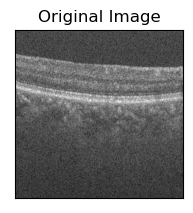

In [3]:
#read greyscale bmp images
imgo = cv.imread('377.bmp')
img = cv.cvtColor(imgo, cv.COLOR_BGR2GRAY)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

Automatically created module for IPython interactive environment


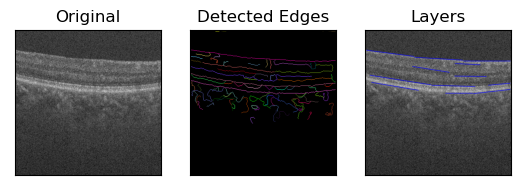

Done


In [ ]:
rng.seed(12345)

def main():

    src = cv.imread('377.bmp')
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    #cv.imshow("source", src)

    ssrc = src.copy()*0
    lsrc = src.copy()
    esrc = src.copy()

    ed = cv.ximgproc.createEdgeDrawing()

    # you can change parameters (refer the documentation to see all parameters)
    EDParams = cv.ximgproc_EdgeDrawing_Params()
    EDParams.AnchorThresholdValue = 0 #default = 0, threshold value used to select anchor points.
    EDParams.EdgeDetectionOperator = 1 #default = 1 for PREWITT, 2 for SOBEL, 3 FOR SCHARR, 4 FOR LSD, indicates the operator used for gradient calculation.
    EDParams.GradientThresholdValue = 10 #default = 20, threshold value of gradiential difference between pixels. Used to create gradient image.
    EDParams.LineFitErrorThreshold = 1.5 #default = 1
    EDParams.MaxDistanceBetweenTwoLines = 0.0 #default = 6.0
    EDParams.MaxErrorThreshold = 10 #default = 1.3
    EDParams.ScanInterval = 10       #default = 1
    EDParams.Sigma = 3.5              #MAIN DETECTION DRIVER, default = 1, sigma value for internal GaussianBlur() function.
    EDParams.MinPathLength = 20     # try changing this value between 5 to 1000, minimum connected pixels length processed to create an edge segment. In gradient image, minimum connected pixels length processed to create an edge segment. Pixels having upper value than GradientThresholdValue will be processed.
    EDParams.MinLineLength = 10     # try changing this value between 5 to 100, minimum line length to detect.
    EDParams.PFmode = True         # default value try to swich it to True, Parameter Free mode will be activated when this value is set as true.
    EDParams.NFAValidation = True   # default value is True try to swich it to False, indicates if NFA (Number of False Alarms) algorithm will be used for line and ellipse validation.

    ed.setParams(EDParams)

    # Detect edges
    # you should call this before detectLines() and detectEllipses()
    ed.detectEdges(gray)

    segments = ed.getSegments()
    lines = ed.detectLines()

    #Draw detected edge segments
    for i in range(len(segments)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv.polylines(ssrc, [segments[i]], False, color, 1, cv.LINE_8)

    #cv.imshow("detected edge segments", ssrc)

    #Draw detected lines
    if lines is not None: # Check if the lines have been found and only then iterate over these and add them to the image
        lines = np.uint16(np.around(lines))
        for i in range(len(lines)):
            cv.line(lsrc, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 1, cv.LINE_AA)

    #cv.imshow("detected lines", lsrc)
    #cv.waitKey(0)
    plt.subplot(1,3,1),plt.imshow(src,cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2),plt.imshow(ssrc,cmap = 'gray')
    plt.title('Detected Edges'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow(lsrc,cmap = 'gray')
    plt.title('Layers'), plt.xticks([]), plt.yticks([])
    plt.show()
    print('Done')
    respond = input("Open images in new window? Type:Y/N:")
    print("Response: " + respond)
    if respond =='Y':
        cv.imshow("source", src)
        cv.imshow("detected edge segments", ssrc)
        cv.imshow("detected lines", lsrc)
        cv.waitKey(2)
        cv.destroyAllWindows()



if __name__ == '__main__':
    print(__doc__)
    main()

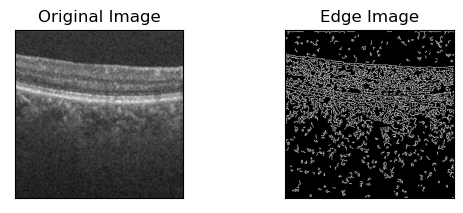

In [5]:
#Canny Edge Detection
def auto_canny(image, sigma=0.33):
    # Compute the median of the single channel pixel intensities
    v = np.median(image)

    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv.Canny(image, lower, upper)

img = cv.blur(img,(3,3))
canny = auto_canny(img)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(canny,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

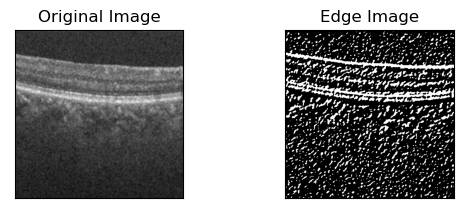

In [6]:
#img_blur = cv.medianBlur(img,7)
img_blur = cv.blur(img,(3,3))
 
# Sobel Edge Detection
sobely = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5)
sobelx = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)
sobel = sobely + sobelx
ret,thresh = cv.threshold(sobel,255,255,0)
# Display Sobel Edge Detection Images
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

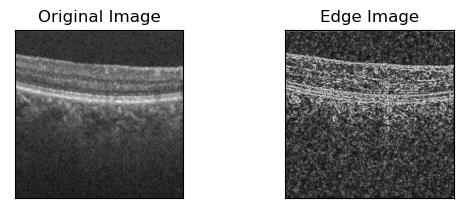

In [7]:
#Robert 1
#img_blur = cv.medianBlur(img,7)
img_blur = cv.blur(img,(3,3))
roberts_cross_v = np.array( [[1, 0 ], 
                             [0,-1 ]] ) 
  
roberts_cross_h = np.array( [[ 0, 1 ], 
                             [ -1, 0 ]] ) 

vertical = ndimage.convolve( img_blur, roberts_cross_v ) 
horizontal = ndimage.convolve( img_blur, roberts_cross_h ) 
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
edged_img*=255

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(edged_img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

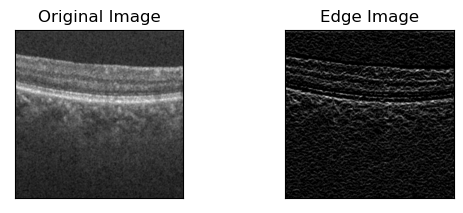

In [9]:
#Robert 2
#img_blur = cv.medianBlur(img,7)
img_blur2 = cv.blur(img,(3,3))
kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])
img_robertx = cv.filter2D(img_blur2, -1, kernelx)
img_roberty = cv.filter2D(img_blur2, -1, kernely)
grad = cv.addWeighted(img_robertx, 0.5, img_roberty, 0.5, 0)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(grad,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

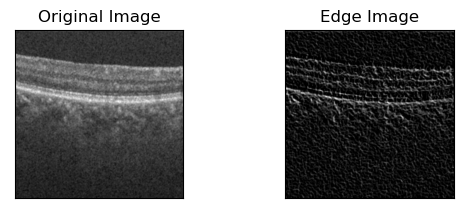

In [10]:
#prewitt
#img_blur = cv.medianBlur(img,7)
img_blur4 = cv.blur(img,(3,3))
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img_blur4, -1, kernelx)
img_prewitty = cv.filter2D(img_blur4, -1, kernely)
prewitt = img_prewittx + img_prewitty
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(prewitt,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

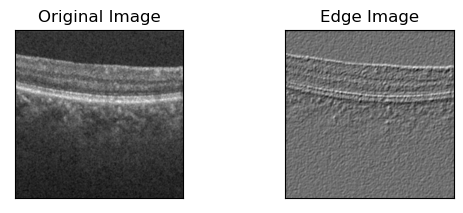

In [11]:
#Scharr Edge Detection

# X gradient Scharr operator
fieldx = cv.Scharr(img_blur4, cv.CV_32F, 1, 0) / 15.36
# Y gradient Scharr operator
fieldy = cv.Scharr(img_blur4, cv.CV_32F, 0, 1) / 15.36
scharr = fieldx + fieldy
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(scharr,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

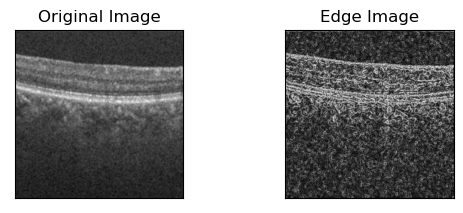

In [12]:
#combine all edge detection into one image
final = scharr+prewitt+grad+edged_img+thresh+canny
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(final,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

In [24]:
minLineLength = 30
maxLineGap = 5
final = image.img_to_array(final, dtype='uint8')
lines = cv.HoughLinesP(final,cv.HOUGH_PROBABILISTIC, np.pi/180, 30, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        cv.polylines(img, [pts], True, (0,255,0))

AttributeError: 'numpy.ndarray' object has no attribute 'img_to_array'

In [ ]:
cv.imwrite('houghlines5.jpg',img)